# 📌 Kreditrisiko-Vorhersage mit Machine Learning

## 🔍 Hintergrund  
Banken und Finanzinstitute müssen entscheiden, ob sie einem Kunden einen Kredit gewähren oder nicht. Eine falsche Entscheidung kann entweder zu **finanziellen Verlusten** führen (wenn ein Kredit nicht zurückgezahlt wird) oder zu **verpassten Einnahmen** (wenn ein zahlungsfähiger Kunde abgelehnt wird).  

Das Ziel dieses Projekts ist es, mithilfe von **Machine Learning** eine **Kreditrisiko-Klassifikation** durchzuführen. Dabei soll ein Modell entwickelt werden, das die Wahrscheinlichkeit vorhersagt, ob ein Kreditnehmer als **risikoreich** oder **sicher** eingestuft wird.  

## 🎯 Ziele des Projekts  
✅ **Datenanalyse & Vorverarbeitung** – Die Kreditdaten verstehen und für das Training vorbereiten  
✅ **Machine-Learning-Modelle trainieren** – Klassifikationsmodelle vergleichen und optimieren  
✅ **Kreditrisiko vorhersagen** – Das beste Modell zur Einstufung von Kreditnehmern nutzen  
✅ **Ergebnisse bewerten & interpretieren** – Die Leistung des Modells anhand von Metriken messen  

## 📊 Datensatz: German Credit Data  
- **Datenquelle**: [German Credit Dataset von Kaggle](https://www.kaggle.com/datasets/arunjangir245/german-credit-card/data)

- **Anzahl der Zeilen:** 1000
- **Anzahl der Spalten:** 21 (20 Merkmale + 1 Zielvariable `credit_risk`)
- **Numerische Variablen (7 Merkmale)**:
  - `duration`, `amount`, `installment_rate`, `age`, `number_credits`, `people_liable`, `present_residence`
- **Kategoriale Variablen (13 Merkmale)**:
  - `status`, `credit_history`, `purpose`, `savings`, `employment_duration`, `personal_status_sex`,  
    `other_debtors`, `property`, `other_installment_plans`, `housing`, `job`, `telephone`, `foreign_worker`
- **Zielvariable (`credit_risk`)**: Binäre Klassifikation (0 = geringer Kreditrisiko, 1 = hohes Kreditrisiko)
- **Fehlende Werte:** Keine (falls vorhanden, müssen sie behandelt werden)
  

## 🛠 Methoden & Tools  
📌 **Datenanalyse & Visualisierung** – `Pandas`, `Matplotlib`, `Seaborn`  
📌 **Feature Engineering & Vorverarbeitung** – `Scikit-Learn` (Encoding, Skalierung)  
📌 **Klassifikationsmodelle** – Logistische Regression, Random Forest, XGBoost oder LightGBM, Support Vector Machine   
📌 **Modellbewertung** – `Precision`, `Recall`, `F1-Score`, `ROC-AUC`  

### ✅ 1. Datenvorverarbeitung
- Daten einlesen (CSV, Pandas nutzen)

- Fehlende Werte identifizieren und behandeln

- Kategorische Variablen in numerische Werte umwandeln (One-Hot-Encoding)

- Daten skalieren mit StandardScaler

In [1]:
import numpy as np
import pandas as pd

# 1. Daten einlesen
df = pd.read_csv('GermanCredit_eur.csv')

In [2]:
print(df.head())

           status  duration                            credit_history  \
0         < 580 €         6   critical account/other credits existing   
1  580 € - 2900 €        48  existing credits paid back duly till now   
2      kein Konto        12   critical account/other credits existing   
3         < 580 €        42  existing credits paid back duly till now   
4         < 580 €        24           delay in paying off in the past   

               purpose        amount    savings employment_duration  \
0  domestic appliances   1793.100627  unbekannt      ... >= 7 years   
1  domestic appliances   9128.093955    < 580 €  1 <= ... < 4 years   
2           retraining   3215.003349    < 580 €  4 <= ... < 7 years   
3     radio/television  12090.007823    < 580 €  4 <= ... < 7 years   
4            car (new)   7469.974384    < 580 €  1 <= ... < 4 years   

   installment_rate                  personal_status_sex other_debtors  ...  \
0                 4                        male : singl

In [3]:
#  2. Fehlende Werte identifizieren und Featurestypen bestimmen
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   status                   1000 non-null   object 
 1   duration                 1000 non-null   int64  
 2   credit_history           1000 non-null   object 
 3   purpose                  1000 non-null   object 
 4   amount                   1000 non-null   float64
 5   savings                  1000 non-null   object 
 6   employment_duration      1000 non-null   object 
 7   installment_rate         1000 non-null   int64  
 8   personal_status_sex      1000 non-null   object 
 9   other_debtors            1000 non-null   object 
 10  present_residence        1000 non-null   int64  
 11  property                 1000 non-null   object 
 12  age                      1000 non-null   int64  
 13  other_installment_plans  1000 non-null   object 
 14  housing                  

In [4]:
# 3. Um mit den kategorische Features zu arbeiten sollten wir sie kodiren.
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Wir wahlen alle kategorische Variablen aus
categorical_coln = df.select_dtypes(['object']).columns

# Mit One-Hote-Encoding kodieren 
# Um Multikollinearität zu vermeiden und um wichtige Informationen aus diesen Spalten zu erhalten, die die Vorhersagen des Modells beeinflussen könnten, schließen wir diese Indikatoren aus.

df = pd.get_dummies(df, columns=[col for col in categorical_coln if col not in ["status", "savings", "employment_duration"]], drop_first=True)

In [5]:
# 4. Numeriche Daten skalieren mit StandartScaler
scaler = StandardScaler()
num_cols = ["duration", "amount", "present_residence", "age", "installment_rate", "number_credits", "people_liable"]
df[num_cols] = scaler.fit_transform(df[num_cols])

In [6]:
print(df.head())

           status  duration    amount    savings employment_duration  \
0         < 580 € -1.236478 -0.745131  unbekannt      ... >= 7 years   
1  580 € - 2900 €  2.248194  0.949817    < 580 €  1 <= ... < 4 years   
2      kein Konto -0.738668 -0.416562    < 580 €  4 <= ... < 7 years   
3         < 580 €  1.750384  1.634247    < 580 €  4 <= ... < 7 years   
4         < 580 €  0.256953  0.566664    < 580 €  1 <= ... < 4 years   

   installment_rate  present_residence       age  number_credits  \
0          0.918477           1.046987  2.766456        1.027079   
1         -0.870183          -0.765977 -1.191404       -0.704926   
2         -0.870183           0.140505  1.183312       -0.704926   
3         -0.870183           1.046987  0.831502       -0.704926   
4          0.024147           1.046987  1.535122        1.027079   

   people_liable  ...  property_unknown/no property  \
0      -0.428290  ...                         False   
1      -0.428290  ...                         Fa

### ✅ 2. Explorative Datenanalyse (EDA)

Die Explorative Datenanalyse (EDA) ist ein wichtiger Schritt in jedem Data-Science-Projekt, da sie hilft, ein besseres Verständnis der Daten zu entwickeln. Wir werden verschiedene Techniken anwenden, um die Daten zusammenzufassen, Trends zu identifizieren und potenzielle Beziehungen zwischen den Variablen zu untersuchen.

- Statistische Zusammenfassungen

- Verteilung der Kreditrisiko-Klassen analysieren

- Korrelation zwischen Variablen untersuchen

- Visualisierung von Trends (Histogramme, Boxplots, Heatmaps)

#### 1. Statistische Zusammenfassungen
Wir beginnen mit einer allgemeinen statistischen Zusammenfassung der numerischen und kategorialen Variablen, um ein erstes Verständnis für die Verteilung und die wichtigsten Merkmale der Daten zu bekommen.

In [7]:
# Statistische Zusammenfassung der numerischen Variablen
print(df.describe())

           duration        amount  installment_rate  present_residence  \
count  1.000000e+03  1.000000e+03      1.000000e+03       1.000000e+03   
mean   1.136868e-16 -1.385558e-16      1.012523e-16      -1.776357e-16   
std    1.000500e+00  1.000500e+00      1.000500e+00       1.000500e+00   
min   -1.402415e+00 -1.070865e+00     -1.764514e+00      -1.672459e+00   
25%   -7.386675e-01 -6.754833e-01     -8.701833e-01      -7.659773e-01   
50%   -2.408572e-01 -3.373443e-01      2.414692e-02       1.405047e-01   
75%    2.569531e-01  2.484620e-01      9.184772e-01       1.046987e+00   
max    4.239436e+00  5.370789e+00      9.184772e-01       1.046987e+00   

                age  number_credits  people_liable  credit_risk  
count  1.000000e+03    1.000000e+03   1.000000e+03  1000.000000  
mean   5.329071e-17   -9.414691e-17  -1.065814e-17     0.700000  
std    1.000500e+00    1.000500e+00   1.000500e+00     0.458487  
min   -1.455261e+00   -7.049260e-01  -4.282896e-01     0.000000  
25%

In [8]:
# Zusammenfassung der kategorialen Variablen
print(df.describe(include=['object']))

            status  savings employment_duration
count         1000     1000                1000
unique           4        5                   5
top     kein Konto  < 580 €  1 <= ... < 4 years
freq           394      603                 339


#### 2. Verteilung der Kreditrisiko-Klassen analysieren
Da die Zielvariable credit_risk binär ist (0 = geringes Risiko, 1 = hohes Risiko), sollten wir die Verteilung der Zielklassen analysieren, um ein Gefühl für die Ungleichgewichtung der Klassen zu bekommen.

C:\Users\avmat\AppData\Local\Temp\ipykernel_18572\1612949454.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'credit_risk', data = df, palette='Set2')


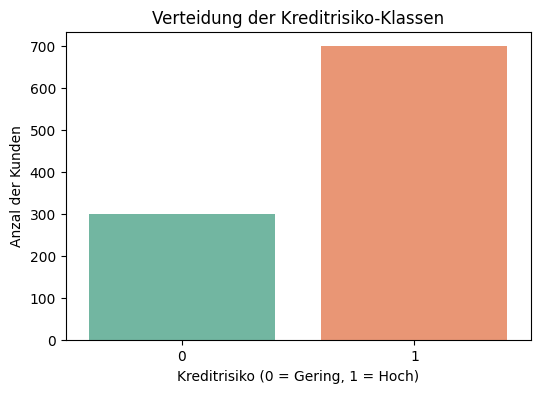

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Verteilung der Zielvariablen 'credit_risk'
plt.figure(figsize = (6,4))
sns.countplot(x = 'credit_risk', data = df, palette='Set2')
plt.title("Verteidung der Kreditrisiko-Klassen")
plt.xlabel("Kreditrisiko (0 = Gering, 1 = Hoch)")
plt.ylabel("Anzal der Kunden")
plt.show()

In [10]:
# Anzahl der Kunden pro Klasse anzeigen
print(df['credit_risk'].value_counts())

credit_risk
1    700
0    300
Name: count, dtype: int64


Erklärung der Zielvariable-Verteilung:

Der Datensatz enthält mehr risikoreiche Kreditnehmer (700) als risikoarme (300), was zu einer klassischen ungleichen Verteilung führt.
Mögliche Lösungsansätze: Bei Modellen, die mit dieser ungleichen Verteilung trainiert werden, könnte ein Class-Balancing-Ansatz (wie Oversampling, Undersampling oder Verwendung von gewichteten Klassen) in Betracht gezogen werden.

#### 3. Korrelation zwischen Variablen untersuchen
Ein wichtiger Schritt in der EDA (Explorative Datenanalyse) ist die Untersuchung von Korrelationen zwischen den numerischen Variablen. Das hilft, Redundanzen zu erkennen und mögliche Beziehungen zwischen den Variablen zu identifizieren.

In [11]:
# Berechnung der Korrelationen zwischen numerischen Variablen
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
print(corr_matrix)


                   duration    amount  installment_rate  present_residence  \
duration           1.000000  0.624984          0.074749           0.034067   
amount             0.624984  1.000000         -0.271316           0.028926   
installment_rate   0.074749 -0.271316          1.000000           0.049302   
present_residence  0.034067  0.028926          0.049302           1.000000   
age               -0.036136  0.032716          0.058266           0.266419   
number_credits    -0.011284  0.020795          0.021669           0.089625   
people_liable     -0.023834  0.017142         -0.071207           0.042643   
credit_risk       -0.214927 -0.154739         -0.072404          -0.002967   

                        age  number_credits  people_liable  credit_risk  
duration          -0.036136       -0.011284      -0.023834    -0.214927  
amount             0.032716        0.020795       0.017142    -0.154739  
installment_rate   0.058266        0.021669      -0.071207    -0.072404  
p

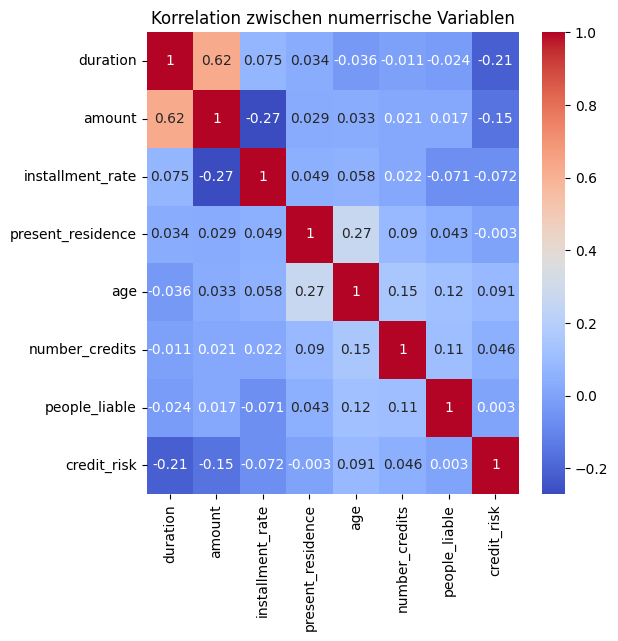

In [12]:
# Erstellen wir Hitmap der Korrelationen 

plt.figure(figsize = (6,6))
sns.heatmap(corr_matrix, annot = True, cmap='coolwarm')
plt.title("Korrelation zwischen numerrische Variablen")
plt.show()

#### Wichtige Beobachtungen:
Starke Korrelationen:

*duration* und *amount* haben eine relativ hohe positive Korrelation (0.625). Das bedeutet, dass höhere Kreditsummen oft mit längeren Laufzeiten verbunden sind.

Negative Korrelation mit der Zielvariable (credit_risk):

*duration* (-0.215) → Längere Kreditlaufzeiten erhöhen tendenziell das Kreditrisiko.
*amount* (-0.155) → Höhere Kreditsummen sind leicht mit einem höheren Kreditrisiko verbunden.
*installment_rate* (-0.072) → Höhere Ratenzahlungen korrelieren leicht mit einem höheren Risiko.

Positive Korrelation mit der Zielvariable (credit_risk):

*age* (0.091) → Ältere Personen haben ein etwas geringeres Risiko, aber die Korrelation ist schwach.
*number_credits* (0.046) und people_liable (0.003) zeigen fast keine Korrelation mit credit_risk, was bedeutet, dass sie das Risiko nicht stark beeinflussen.

Andere Beobachtungen:

*present_residence* und *age* zeigen eine mittlere Korrelation (0.266), was darauf hindeutet, dass ältere Personen oft länger an einem Wohnort leben.

### 4. Visualisierung von Trends (Histogramme, Boxplots, Heatmaps)
Um die Verteilung und eventuelle Ausreißer in den Daten zu visualisieren, erstellen wir Histogramme, Boxplots und Heatmaps.

Histogramme für numerische Variablen:

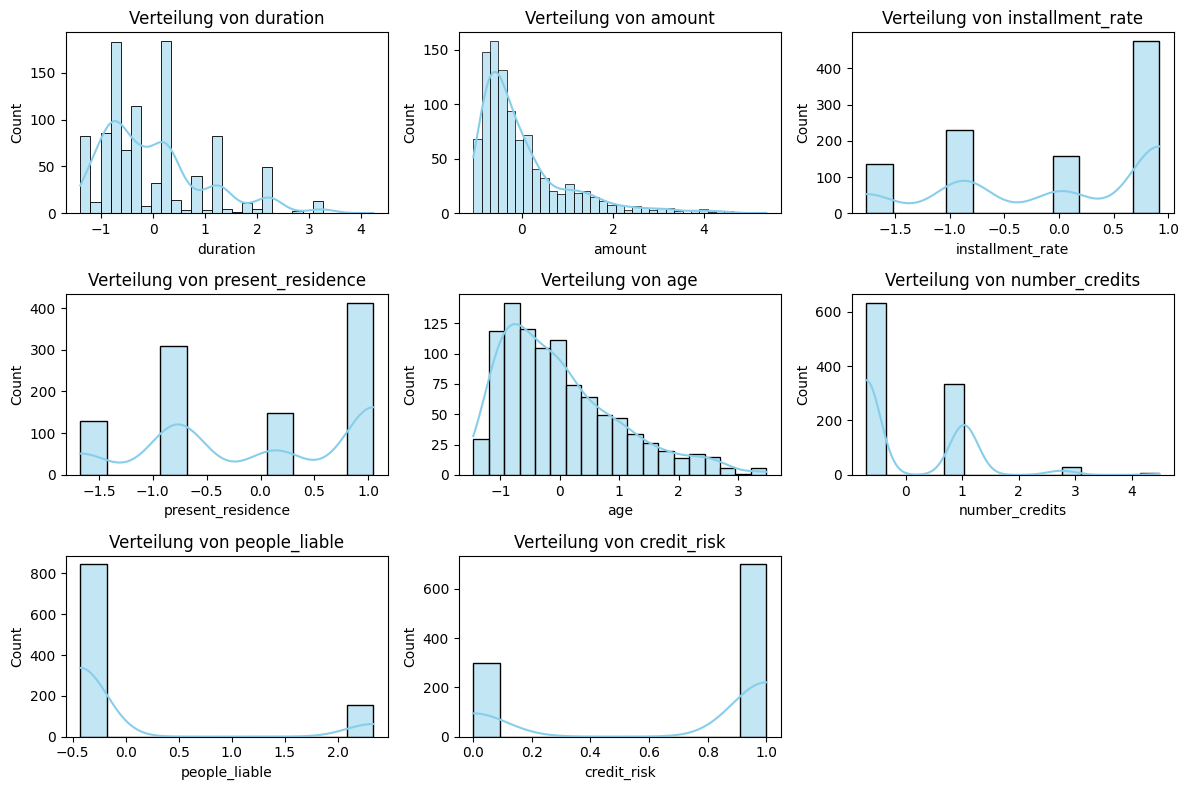

In [13]:
# Erstellen von Histogrammen für numerische Variablen
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)  # 3x3 Grid
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f"Verteilung von {col}")
plt.tight_layout()
plt.show()

Boxplots zur Untersuchung von Ausreißern:

C:\Users\avmat\AppData\Local\Temp\ipykernel_18572\3755489929.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='credit_risk', y=col, data=df, palette='Set2')
C:\Users\avmat\AppData\Local\Temp\ipykernel_18572\3755489929.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='credit_risk', y=col, data=df, palette='Set2')
C:\Users\avmat\AppData\Local\Temp\ipykernel_18572\3755489929.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='credit_risk', y=col, data=df, palette='Set2')
C:\Users\avmat\AppData\Local\Temp\ipykernel_18572\3755489929.

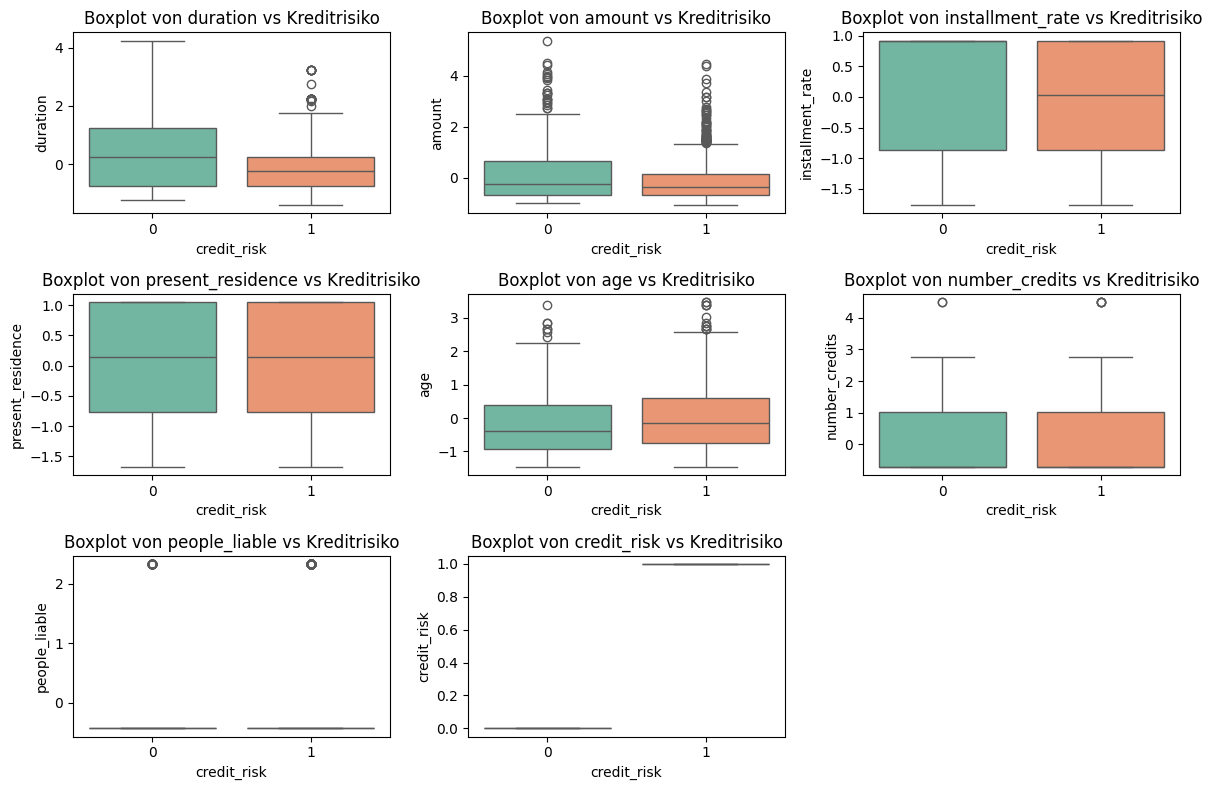

In [14]:
# Erstellen von Boxplots für numerische Variablen
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='credit_risk', y=col, data=df, palette='Set2')
    plt.title(f"Boxplot von {col} vs Kreditrisiko")
plt.tight_layout()
plt.show()

#### 5. Kategorielle Variablen visualisieren
Für kategoriale Variablen (z. B. *status*, *purpose*, *housing*) untersuchen wir ihre Verteilung in Bezug auf die Zielvariable credit_risk.

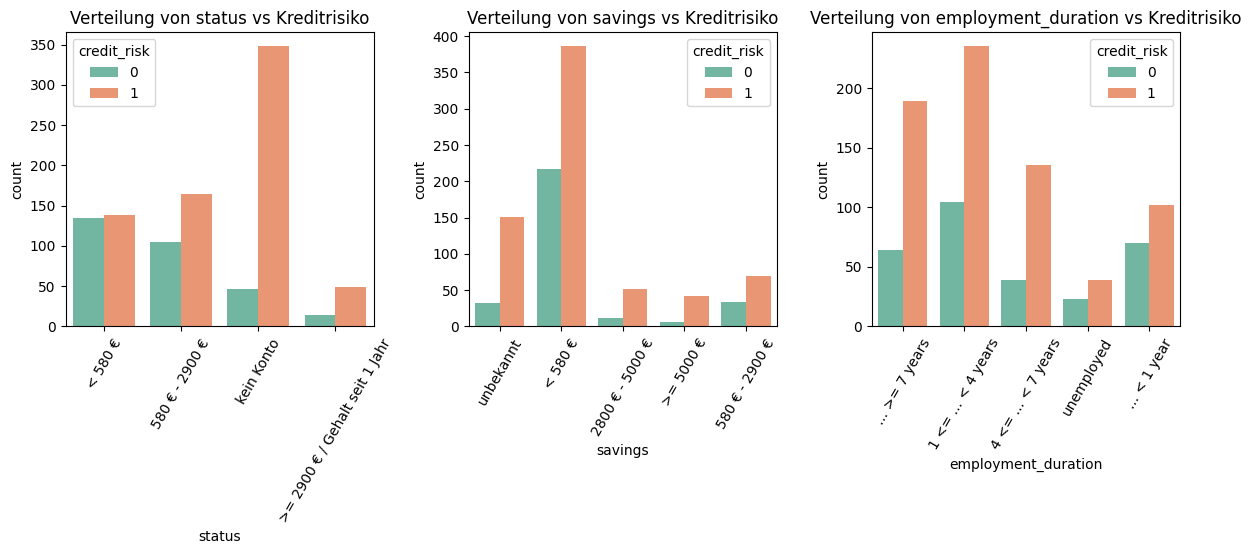

In [15]:
# Visualisierung der Verteilung kategorialer Variablen
categorical_cols = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(12, 14))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)  # 3x3 Grid
    sns.countplot(x=col, hue='credit_risk', data=df, palette='Set2')
    plt.xticks(rotation=60)
    plt.title(f"Verteilung von {col} vs Kreditrisiko")
plt.tight_layout()
plt.show()

#### 6. Pairplot zur Untersuchung von Beziehungen
Ein pairplot hilft, die Verteilung und Zusammenhänge zwischen numerischen Variablen darzustellen. Wir färben die Punkte nach credit_risk, um Unterschiede zwischen den beiden Kreditrisikoklassen besser zu erkennen.

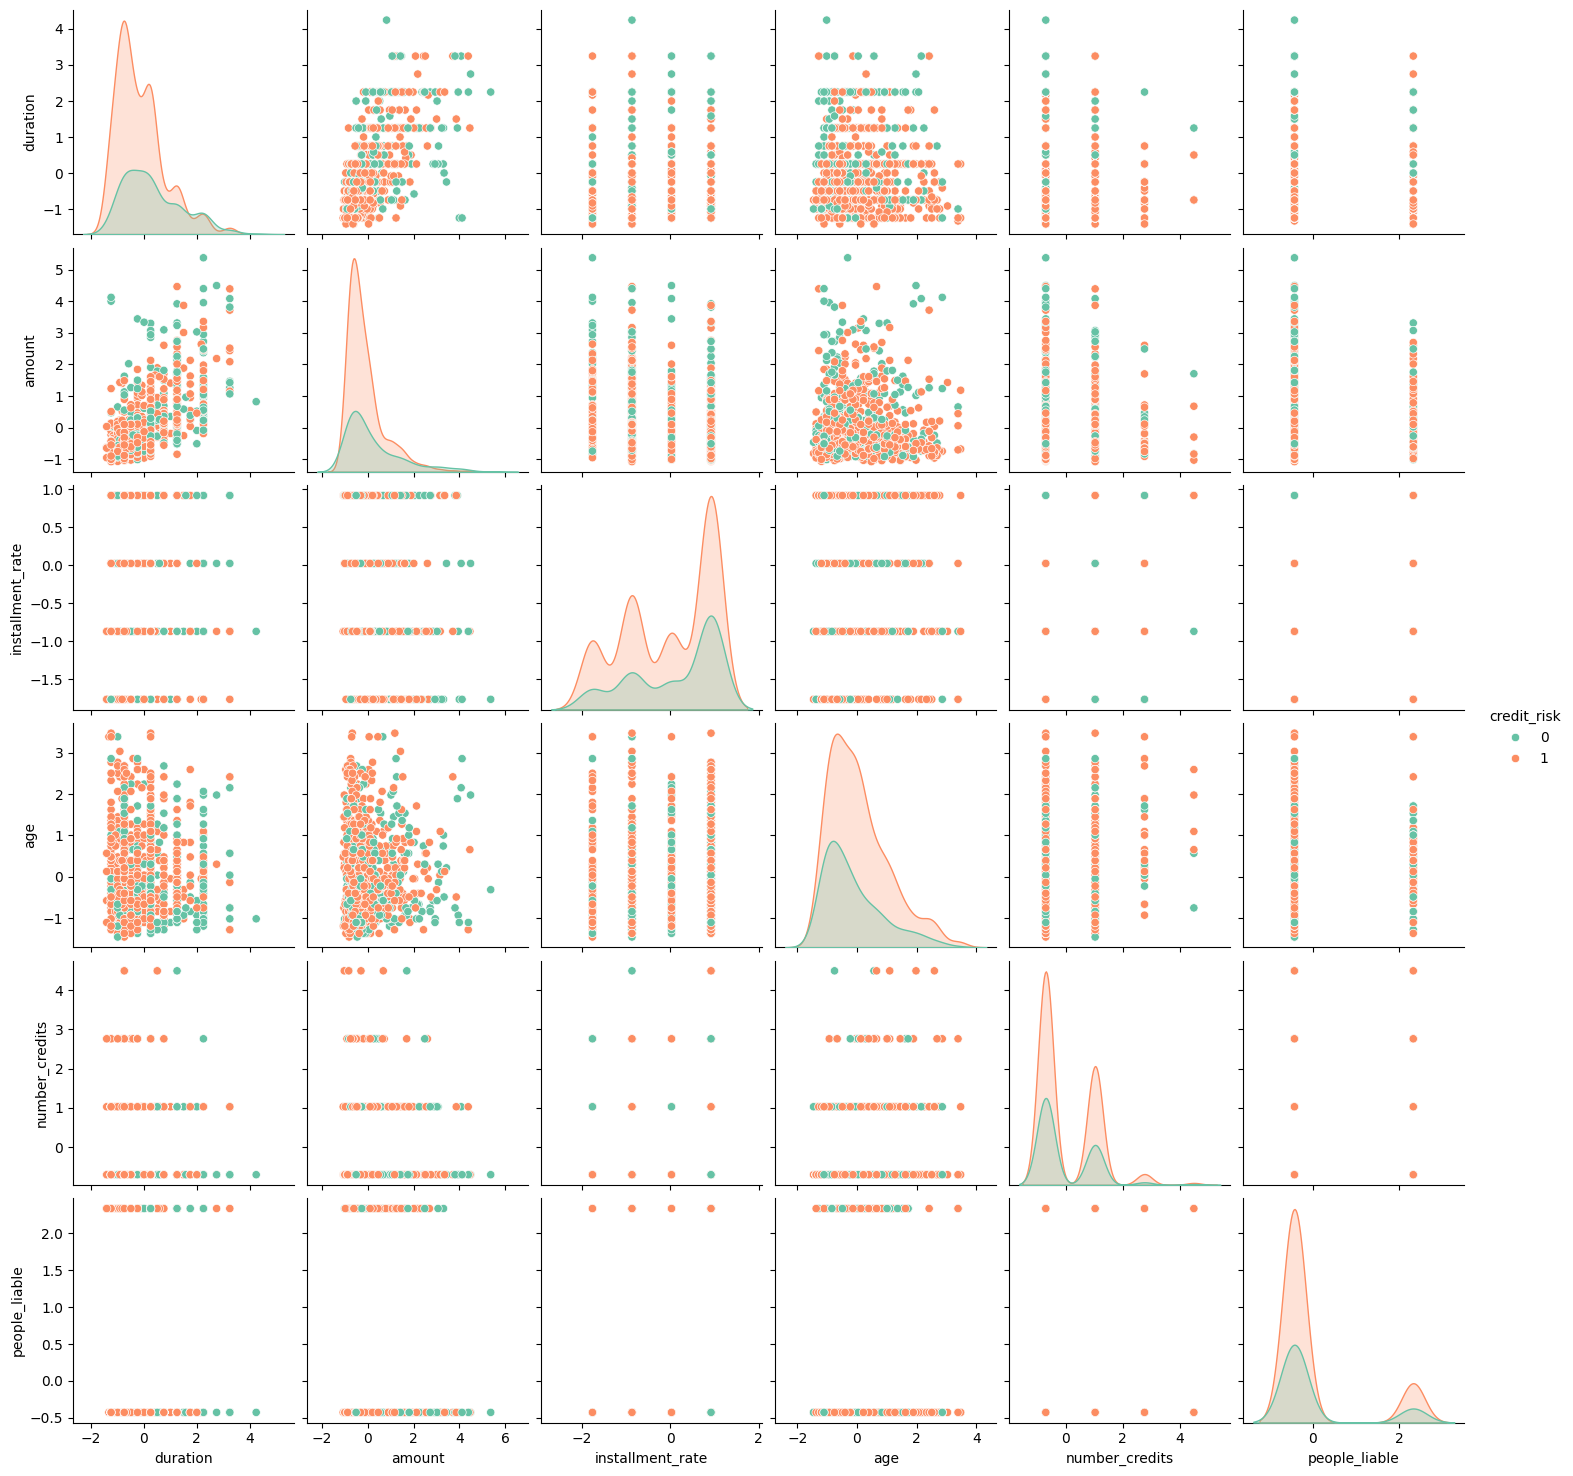

In [16]:
# Auswahl numerischer Variablen für Pairplot
numerical_cols = ["duration", "amount", "installment_rate", "age", "number_credits", "people_liable"]

# Pairplot mit Unterscheidung nach Kreditrisiko
sns.pairplot(df, vars=numerical_cols, hue="credit_risk", palette="Set2", diag_kind="kde")

# Anzeigen des Plots
plt.show()

# ✅ 3. Modelltraining
Wir testen verschiedene Klassifizierungsmodelle, vergleichen sie und optimieren das beste Modell.

#### ✅ 1. Datenvorbereitung: 

One-Hot-Encoding für kategoriale Variablen
Skalierung für numerische Variablen

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

In [31]:
# Daten neu herunterladen um veränderungen zu vermeiden
df = pd.read_csv('GermanCredit_eur.csv')
df = df.drop(columns=['telephone'])

#Definition der Features für das Modell
categorical_features = ["status", "credit_history", "purpose", "savings", "employment_duration", "personal_status_sex", "other_debtors", "property", "other_installment_plans", "housing", "job", "foreign_worker"]

numerical_features = ["duration", "amount", "installment_rate", "present_residence", "age", "number_credits", "people_liable"]

# One-Hot-Encoding für kategoriale Variablen und Skalierung für numerische Variablen
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

# Daten in Features (X) und Zielvariable (y) aufteilen
X = df[numerical_features + categorical_features]
y = df["credit_risk"]

# Train-Test-Split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

#### ✅ 2. Modelle trainieren, bewerten & vergleichen:
Modelle trainieren:

- Logistische Regression (Baseline-Modell)
- Random Forest (starkes interpretierbares Modell)
- XGBoost / LightGBM (Boosting für bessere Performance)
- SVM (besonders gut für kleinere Datensätze)
- Neuronales Netzwerk (MLPClassifier) (falls wir Deep Learning testen wollen)

Modelle bewerten & vergleichen:

- Metriken wie Accuracy, Precision, Recall, F1-Score, ROC-AUC berechnen




In [32]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
# Verschiedene Modelle trainieren
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42),
    "SUpport Vector Machine": SVC(kernel="rbf", random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=500, random_state=42)
}

results = {}

for name, model in models.items():
    pipeline = Pipeline([
        ("preprocessor", preprocessor),  # Stelle sicher, dass 'preprocessor' definiert ist!
        ("classifier", model)
    ])
    
    # Modell trainieren
    pipeline.fit(X_train, y_train)
    
    # Vorhersagen treffen
    y_pred = pipeline.predict(X_test)
    
    # Accuracy berechnen
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    # ROC AUC berechnen
    roc_auc_rf = roc_auc_score(y_test, y_pred)
    # Classification Report berechnen
    classification_rep = classification_report(y_test, y_pred, digits=4)
    print(f"\n🔹 {name} - Accuracy: {acc:.4f}")
    print(f"\n🔹{name} - ROC-AUC-Score: {roc_auc_rf:.4f}")
    print(classification_rep) 



🔹 Logistic Regression - Accuracy: 0.7100

🔹Logistic Regression - ROC-AUC-Score: 0.6357
              precision    recall  f1-score   support

           0     0.5192    0.4500    0.4821        60
           1     0.7770    0.8214    0.7986       140

    accuracy                         0.7100       200
   macro avg     0.6481    0.6357    0.6404       200
weighted avg     0.6997    0.7100    0.7037       200


🔹 Random Forest - Accuracy: 0.7350

🔹Random Forest - ROC-AUC-Score: 0.6583
              precision    recall  f1-score   support

           0     0.5714    0.4667    0.5138        60
           1     0.7881    0.8500    0.8179       140

    accuracy                         0.7350       200
   macro avg     0.6798    0.6583    0.6658       200
weighted avg     0.7231    0.7350    0.7266       200


🔹 XGBoost - Accuracy: 0.7400

🔹XGBoost - ROC-AUC-Score: 0.6714
              precision    recall  f1-score   support

           0     0.5769    0.5000    0.5357        60
         

C:\Users\avmat\AppData\Local\Temp\ipykernel_18572\3295904155.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")


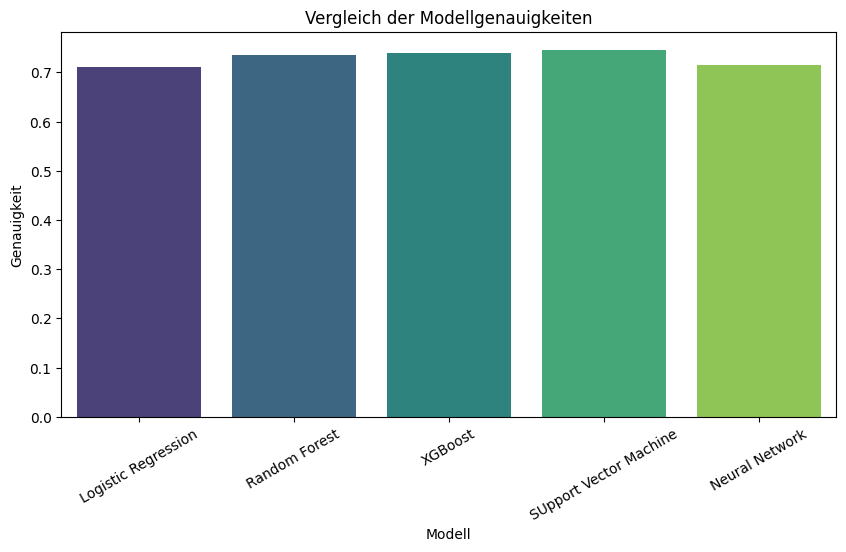

In [33]:
# Ergebnisse visualisieren
plt.figure(figsize=(10, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")
plt.xlabel("Modell")
plt.ylabel("Genauigkeit")
plt.title("Vergleich der Modellgenauigkeiten")
plt.xticks(rotation=30)
plt.show()

#### 📊 Modellvergleich & Nächste Schritte
🔹 Analyse der Ergebnisse:
- SVM und XGBoost(74% Accuracy) schneidet am besten ab, gefolgt von Random Forest (73%).

- Logistische Regression und das neuronale Netz haben alle ähnliche Werte (~71% Accuracy).

- Das größte Problem: Die Modelle erkennen die Klasse "0" (kreditwürdig) schlechter. 

    - Z. B. hat das beste Modell (SVM) für Klasse "0" nur 35% Recall, was bedeutet, dass viele gute Kunden als "riskant" eingestuft werden.

Wir wiederholen das Training mit **SMOTE** (Synthetic Minority Over-sampling Technique), um die Klassen auszugleichen und zu sehen, ob sich die Ergebnisse verbessern.

In [34]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

# Ziel- und Feature-Variablen definieren
X = df.drop(columns=["credit_risk"])  # Features
y = df["credit_risk"]  # Zielvariable

# Splitten in Trainings- und Testdaten (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# SMOTE anwenden (Oversampling der kleineren Klasse)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Modelle definieren
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42),
    "SVM": SVC(kernel='rbf', probability=True),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
}

# Modelle trainieren und evaluieren
results = {}
for name, model in models.items():
    model.fit(X_train_smote, y_train_smote ) # Trainieren mit SMOTE-Daten
    y_pred = model.predict(X_test)
    # Accuracy berechnen
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    # ROC AUC berechnen
    roc_auc_rf = roc_auc_score(y_test, y_pred)
    # Classification Report berechnen
    classification_rep = classification_report(y_test, y_pred, digits=4)
    print(f"\n🔹 {name} - Accuracy: {acc:.4f}")
    print(f"\n🔹{name} - ROC-AUC-Score: {roc_auc_rf:.4f}")
    print(classification_rep) 



🔹 Logistic Regression - Accuracy: 0.7400

🔹Logistic Regression - ROC-AUC-Score: 0.7417
              precision    recall  f1-score   support

           0     0.5432    0.7458    0.6286        59
           1     0.8739    0.7376    0.8000       141

    accuracy                         0.7400       200
   macro avg     0.7086    0.7417    0.7143       200
weighted avg     0.7764    0.7400    0.7494       200


🔹 Random Forest - Accuracy: 0.8100

🔹Random Forest - ROC-AUC-Score: 0.7519
              precision    recall  f1-score   support

           0     0.7059    0.6102    0.6545        59
           1     0.8456    0.8936    0.8690       141

    accuracy                         0.8100       200
   macro avg     0.7758    0.7519    0.7618       200
weighted avg     0.8044    0.8100    0.8057       200


🔹 XGBoost - Accuracy: 0.8100

🔹XGBoost - ROC-AUC-Score: 0.7519
              precision    recall  f1-score   support

           0     0.7059    0.6102    0.6545        59
         

🔍 Ergebnisse der Modelle nach Anwendung von SMOTE:
🔹Logistische Regression:

Genauigkeit (Accuracy): 0.7400
ROC-AUC-Score: 0.7417
Klassifikationsbericht:
Präzision: 0.5432 für Klasse 0, 0.8739 für Klasse 1
Recall: 0.7458 für Klasse 0, 0.7376 für Klasse 1
F1-Score: 0.6286 für Klasse 0, 0.8000 für Klasse 1

🔹Random Forest:

Genauigkeit (Accuracy): 0.7950
ROC-AUC-Score: 0.7314
Klassifikationsbericht:
Präzision: 0.6800 für Klasse 0, 0.8333 für Klasse 1
Recall: 0.5763 für Klasse 0, 0.8865 für Klasse 1
F1-Score: 0.6239 für Klasse 0, 0.8591 für Klasse 1

🔹XGBoost:

Genauigkeit (Accuracy): 0.8100
ROC-AUC-Score: 0.7519
Klassifikationsbericht:
Präzision: 0.7059 für Klasse 0, 0.8456 für Klasse 1
Recall: 0.6102 für Klasse 0, 0.8936 für Klasse 1
F1-Score: 0.6545 für Klasse 0, 0.8690 für Klasse 1

🔹SVM:

Genauigkeit (Accuracy): 0.7650
ROC-AUC-Score: 0.7397
Klassifikationsbericht:
Präzision: 0.5882 für Klasse 0, 0.8561 für Klasse 1
Recall: 0.6780 für Klasse 0, 0.8014 für Klasse 1
F1-Score: 0.6299 für Klasse 0, 0.8278 für Klasse 1

🔹Neurales Netzwerk:

Genauigkeit (Accuracy): 0.7750
ROC-AUC-Score: 0.7320
Klassifikationsbericht:
Präzision: 0.6167 für Klasse 0, 0.8429 für Klasse 1
Recall: 0.6271 für Klasse 0, 0.8369 für Klasse 1
F1-Score: 0.6218 für Klasse 0, 0.8399 für Klasse 1


👉 Zusammenfassung der Ergebnisse:
XGBoost hat die höchste Genauigkeit (0.8100) und den besten ROC-AUC-Score (0.7519), was darauf hinweist, dass es die beste Leistung bei der Trennung der Klassen zeigt.
Random Forest hat eine gute Leistung mit einer Genauigkeit von 0.7950 und einem ROC-AUC-Score von 0.7314.
SVM und Neurales Netzwerk bieten ebenfalls solide Ergebnisse, aber sie liegen hinter XGBoost und Random Forest.
Logistische Regression hat die niedrigste Genauigkeit, aber trotzdem ein akzeptables Ergebnis.
 



📌 Nächste Schritte:
Wir probieren Hyperparameter-Tuning aus, um die Modelle weiter zu verbessern? 🚀

Wir fokussieren uns auf die drei besten Modelle:

✅ Random Forest

✅ SVM (Support Vector Machine)

✅ XGBoost (eXtreme Gradient Boosting)

Jetzt führen wir das Hyperparameter-Tuning für diese drei Modelle durch.

1️⃣ Random Forest – Hyperparameter-Tuning
Wichtige Parameter:

n_estimators: Anzahl der Entscheidungsbäume

max_depth: Maximale Tiefe der Bäume

min_samples_split: Mindestanzahl an Samples für eine Teilung

min_samples_leaf: Mindestanzahl an Samples pro Blatt

In [35]:
from sklearn.model_selection import GridSearchCV
param_grid_rf = {
    'n_estimators': [50,100,200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# GridSearchCV für Random Forest
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv =5, scoring="accuracy", n_jobs=-1 )
grid_rf.fit(X_train_smote, y_train_smote)

# Beste Parameter
print(f"Beste Parameter für Random Forest: {grid_rf.best_params_}")
print(f"Beste Genauigkeit: {grid_rf.best_score_:.4f}")


Beste Parameter für Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Beste Genauigkeit: 0.8311


2️⃣ SVM – Hyperparameter-Tuning Wichtige Parameter:

C: Regularisierungsparameter

kernel: Kernel-Typ (linear, rbf, poly, sigmoid)

gamma: Steuert die Komplexität bei rbf/poly-Kernel

In [36]:
param_grid_svm = {
    "C": [0.1, 1, 10, 100],
    "kernel": ["linear", "rbf"],
    "gamma": ["scale", "auto"]
}

# GridSearchCV für SVM
grid_svm = GridSearchCV(SVC(), param_grid_svm, cv = 5 , scoring="accuracy",n_jobs=-1)
grid_svm.fit(X_train_smote, y_train_smote) 

# Beste Parameter
print(f"Beste Parameter für SVM: {grid_svm.best_params_}")
print(f"Beste Genauigkeit: {grid_svm.best_score_:.4f}")

Beste Parameter für SVM: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Beste Genauigkeit: 0.8525


3️⃣ XGBoost – Hyperparameter-Tuning
Wichtige Parameter:

n_estimators: Anzahl der Bäume

max_depth: Maximale Tiefe der Bäume

learning_rate: Lernrate (wie stark sich das Modell anpasst)

subsample: Anteil der Daten, die für jeden Baum verwendet werden

In [37]:
# Parameter-Raster für GridSearch
param_grid_xgb = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 6, 10],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.7, 1.0]
}

# GridSearchCV für XGBoost
grid_xgb = GridSearchCV(XGBClassifier(eval_metric="logloss", random_state=42), 
                         param_grid_xgb, cv=5, scoring="accuracy", n_jobs=-1)
grid_xgb.fit(X_train_smote, y_train_smote)

# Beste Parameter
print(f"Beste Parameter für XGBoost: {grid_xgb.best_params_}")
print(f"Beste Genauigkeit: {grid_xgb.best_score_:.4f}")

Beste Parameter für XGBoost: {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 100, 'subsample': 0.7}
Beste Genauigkeit: 0.8114


Vergleichen wir nun diese Modelle miteinander.

In [39]:
df = pd.read_csv('GermanCredit_eur.csv')
df = df.drop(columns=['telephone'])

#Definition der Features für das Modell
categorical_features = ["status", "credit_history", "purpose", "savings", "employment_duration", "personal_status_sex", "other_debtors", "property", "other_installment_plans", "housing", "job", "foreign_worker"]

numerical_features = ["duration", "amount", "installment_rate", "present_residence", "age", "number_credits", "people_liable"]

# One-Hot-Encoding für kategoriale Variablen und Skalierung für numerische Variablen
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

# Daten in Features (X) und Zielvariable (y) aufteilen
X = df[numerical_features + categorical_features]
y = df["credit_risk"]


# Splitten in Trainings- und Testdaten (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# SMOTE anwenden (Oversampling der kleineren Klasse)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Modelle definieren
hyper_models = {
    "Random Forest": RandomForestClassifier(max_depth=None, min_samples_leaf= 1, min_samples_split= 2, n_estimators=100, random_state=42),
    "SVM": SVC(C=100, gamma='scale', kernel='rbf', probability=True),
    "XGB": XGBClassifier(eval_metric="logloss", learning_rate=0.2, max_depth= 10, n_estimators=100, subsample= 0.7, random_state=42)
}

# Modelle trainieren und evaluieren
results = {}
for name, model in hyper_models.items():
    model.fit(X_train_smote, y_train_smote)  # Trainieren mit SMOTE-Daten
    y_pred = model.predict(X_test)
    # Accuracy berechnen
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    # ROC AUC berechnen
    roc_auc_rf = roc_auc_score(y_test, y_pred)
    # Classification Report berechnen
    classification_rep = classification_report(y_test, y_pred, digits=4)
    print(f"\n🔹{name} - Accuracy: {acc:.4f}")
    print(f"\n🔹{name} - ROC-AUC-Score: {roc_auc_rf:.4f}")
    print(classification_rep) 

    


🔹Random Forest - Accuracy: 0.8100

🔹Random Forest - ROC-AUC-Score: 0.7519
              precision    recall  f1-score   support

           0     0.7059    0.6102    0.6545        59
           1     0.8456    0.8936    0.8690       141

    accuracy                         0.8100       200
   macro avg     0.7758    0.7519    0.7618       200
weighted avg     0.8044    0.8100    0.8057       200


🔹SVM - Accuracy: 0.7350

🔹SVM - ROC-AUC-Score: 0.6938
              precision    recall  f1-score   support

           0     0.5469    0.5932    0.5691        59
           1     0.8235    0.7943    0.8087       141

    accuracy                         0.7350       200
   macro avg     0.6852    0.6938    0.6889       200
weighted avg     0.7419    0.7350    0.7380       200


🔹XGB - Accuracy: 0.8050

🔹XGB - ROC-AUC-Score: 0.7385
              precision    recall  f1-score   support

           0     0.7083    0.5763    0.6355        59
           1     0.8355    0.9007    0.8669       14

#### ✅ Analyse:
**Random Forest**:

Das Modell erzielt die höchste Recall für Klasse 1 (0.89), was es besonders nützlich macht, um möglichst viele Fälle mit hohem Risiko zu erkennen.

Allerdings hat es einen niedrigeren Recall für Klasse 0 (0.61), was bedeutet, dass es Fälle mit geringem Risiko häufiger übersieht.

**SVM**:

Dieses Modell bietet eine ausgewogenere Balance zwischen Klasse 0 und 1.

Der Recall für Klasse 0 (0.59) ist höher als bei Random Forest, jedoch sind die Werte für Accuracy und F1-Score niedriger als bei den anderen Modellen.

**XGBoost**:

Sehr ausgewogenes Modell: Es zeigt gute Ergebnisse für beide Klassen, mit einem Recall für Klasse 0 (0.57) und Klasse 1 (0.90).

Die Performance ist ähnlich wie bei Random Forest, aber es bietet eine etwas bessere Balance zwischen den Klassen.

#### ✅ Fazit:
Wenn der Fokus auf Klasse 1 (hohes Risiko) liegt und möglichst viele Fälle erkannt werden sollen, ist Random Forest die beste Wahl.

Wenn jedoch eine ausgewogene Performance zwischen beiden Klassen wichtig ist, eignet sich XGBoost besser.

#### ✅ Feature Importance analysieren – Welche Merkmale beeinflussen die Entscheidung am meisten?
 
Reduzierung von weniger wichtigen Features (Feature Selection), um Overfitting zu vermeiden.

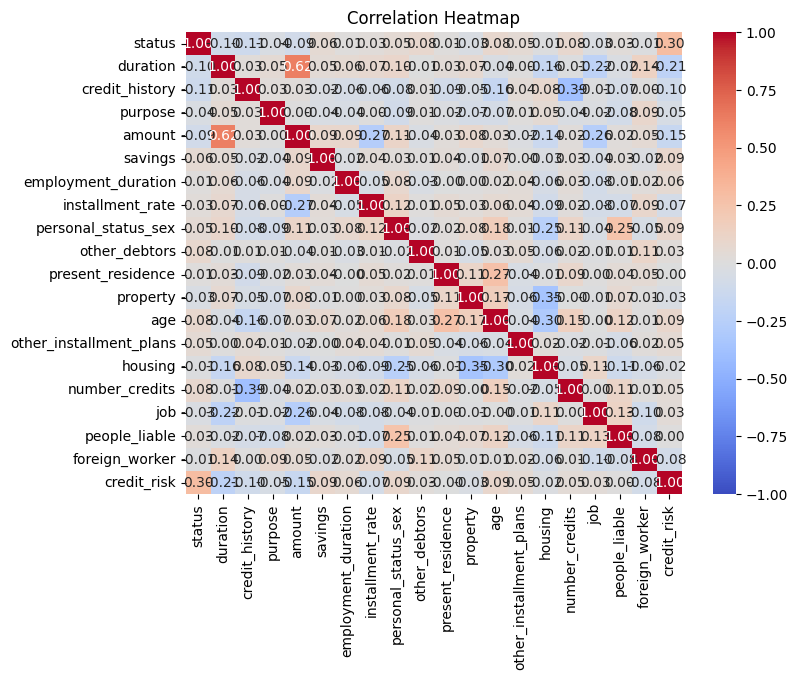

In [40]:
from sklearn.preprocessing import LabelEncoder

# Кодирование категориальных переменных
label_encoder = LabelEncoder()
for features in categorical_features:
    df[features] = label_encoder.fit_transform(df[features])
    
# Расчет корреляции для числовых значений
corr_matrix = df.corr()

# Визуализация тепловой карты
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()    

In [41]:
importent_categorical_features = ['status',  'credit_history', 'savings', 'personal_status_sex']
importent_numerical_features = ['duration ', 'amount', 'installment_rate', 'age']
# One-Hot-Encoding für relevante kategoriale Variablen und Skalierung für relevante  numerische Variablen

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

# Daten in Features (X) und Zielvariable (y) aufteilen
X = df[numerical_features + categorical_features]
y = df["credit_risk"]

# Train-Test-Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [42]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# SMOTE anwenden (Oversampling der kleineren Klasse)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Modelle definieren
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42),
    "SVM": SVC(kernel='rbf', probability=True),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
}

# Modelle trainieren und evaluieren
results = {}
for name, model in models.items():
    model.fit(X_train_smote, y_train_smote ) # Trainieren mit SMOTE-Daten
    y_pred = model.predict(X_test)
    # Accuracy berechnen
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    # ROC AUC berechnen
    roc_auc_rf = roc_auc_score(y_test, y_pred)
    # Classification Report berechnen
    classification_rep = classification_report(y_test, y_pred, digits=4)
    print(f"\n🔹 {name} - Accuracy: {acc:.4f}")
    print(f"\n🔹{name} - ROC-AUC-Score: {roc_auc_rf:.4f}")
    print(classification_rep)


🔹 Logistic Regression - Accuracy: 0.6750

🔹Logistic Regression - ROC-AUC-Score: 0.6583
              precision    recall  f1-score   support

           0     0.4684    0.6167    0.5324        60
           1     0.8099    0.7000    0.7510       140

    accuracy                         0.6750       200
   macro avg     0.6391    0.6583    0.6417       200
weighted avg     0.7074    0.6750    0.6854       200


🔹 Random Forest - Accuracy: 0.7350

🔹Random Forest - ROC-AUC-Score: 0.6631
              precision    recall  f1-score   support

           0     0.5686    0.4833    0.5225        60
           1     0.7919    0.8429    0.8166       140

    accuracy                         0.7350       200
   macro avg     0.6803    0.6631    0.6696       200
weighted avg     0.7250    0.7350    0.7284       200


🔹 XGBoost - Accuracy: 0.7400

🔹XGBoost - ROC-AUC-Score: 0.6857
              precision    recall  f1-score   support

           0     0.5690    0.5500    0.5593        60
         

Die Analyse der Modellen mit nur einflussreichen Indikatoren zeigte ein schlechteres Ergebnis als Modelle mit allen Indikatoren

In [48]:
# Daten laden und Spalte "telephone" entfernen
df = pd.read_csv("GermanCredit_eur.csv")
df = df.drop(columns=["telephone"])

# Definition der Features
categorical_features = ["status", "credit_history", "purpose", "savings", "employment_duration", "personal_status_sex", "other_debtors", "property", "other_installment_plans", "housing", "job", "foreign_worker"]
numerical_features = ["duration", "amount", "installment_rate", "present_residence", "age", "number_credits", "people_liable"]

# One-Hot-Encoding für kategoriale Variablen und Skalierung für numerische Variablen
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

# Daten in Features (X) und Zielvariable (y) aufteilen
X = df[numerical_features + categorical_features]
y = df["credit_risk"]

# Trainings- und Testdaten splitten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# SMOTE (Oversampling der kleineren Klasse)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_transformed, y_train)

# Modell definieren und trainieren
final_model = XGBClassifier(eval_metric="logloss", learning_rate=0.2, max_depth= 10, n_estimators=100, subsample= 0.7, random_state=42)
final_model.fit(X_train_smote, y_train_smote)

# Vorhersage auf Testdaten
y_pred = final_model.predict(X_test_transformed)

# Modellbewertung
acc = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, digits=4)

# Ergebnisse ausgeben
print(f"\n🔹XGBClassifier - Accuracy: {acc:.4f}")
print(f"🔹XGBClassifier - ROC-AUC-Score: {roc_auc:.4f}")
print(classification_rep)



🔹XGBClassifier - Accuracy: 0.8050
🔹XGBClassifier - ROC-AUC-Score: 0.7385
              precision    recall  f1-score   support

           0     0.7083    0.5763    0.6355        59
           1     0.8355    0.9007    0.8669       141

    accuracy                         0.8050       200
   macro avg     0.7719    0.7385    0.7512       200
weighted avg     0.7980    0.8050    0.7986       200



In [49]:
import joblib

# Preprocessing und Modell speichern
joblib.dump(preprocessor, "preprocessor.pkl")
joblib.dump(final_model, "xgb_credit_risk.pkl")

print("✅ Preprocessor gespeichert: preprocessor.pkl")
print("✅ Modell gespeichert: xgb_credit_risk.pkl")

✅ Preprocessor gespeichert: preprocessor.pkl
✅ Modell gespeichert: xgb_credit_risk.pkl
